In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

%matplotlib inline

In [4]:
file_path = '/content/phone_usage_india.csv'
df = pd.read_csv(file_path)

df.head()

,User ID,Age,Gender,Location,Phone Brand,OS,Screen Time (hrs/day),Data Usage (GB/month),Calls Duration (mins/day),Number of Apps Installed,Social Media Time (hrs/day),E-commerce Spend (INR/month),Streaming Time (hrs/day),Gaming Time (hrs/day),Monthly Recharge Cost (INR),Primary Use
0,U00001,53,Male,Mumbai,Vivo,Android,3.7,23.9,37.9,104,3.9,469,5.2,4.1,803,Education
1,U00002,60,Other,Delhi,Realme,iOS,9.2,28.1,13.7,169,2.8,4997,5.1,0.4,1526,Gaming
2,U00003,37,Female,Ahmedabad,Nokia,Android,4.5,12.3,66.8,96,3.0,2381,1.7,2.9,1619,Entertainment
3,U00004,32,Male,Pune,Samsung,Android,11.0,25.6,156.2,146,5.2,1185,3.2,0.3,1560,Entertainment
4,U00005,16,Male,Mumbai,Xiaomi,iOS,2.2,2.5,236.2,86,5.5,106,3.4,2.3,742,Social Media


In [5]:
df.isnull().sum()

,0
User ID,0
Age,0
Gender,0
Location,0
Phone Brand,0
OS,0
Screen Time (hrs/day),0
Data Usage (GB/month),0
Calls Duration (mins/day),0
Number of Apps Installed,0


In [6]:
df.dtypes

,0
User ID,object
Age,int64
Gender,object
Location,object
Phone Brand,object
OS,object
Screen Time (hrs/day),float64
Data Usage (GB/month),float64
Calls Duration (mins/day),float64
Number of Apps Installed,int64


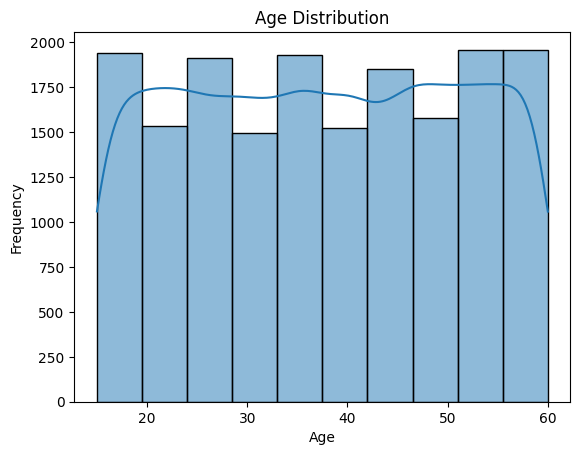

In [7]:
sns.histplot(df['Age'], bins=10, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

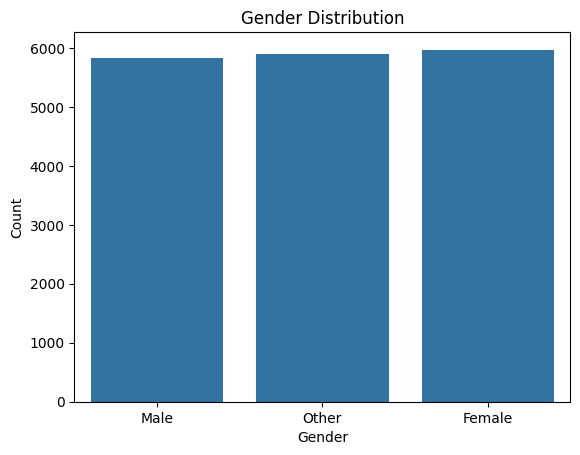

In [8]:
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

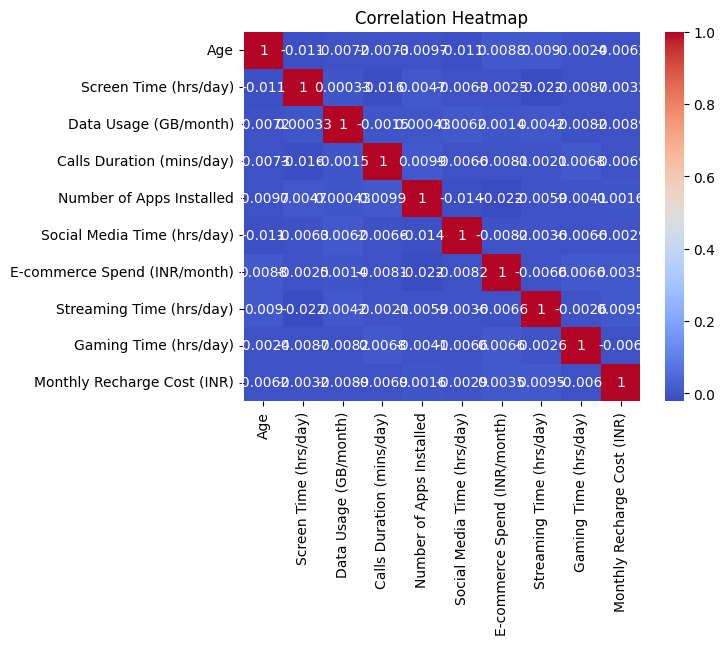

In [9]:
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [10]:
df['Total Daily Usage (hrs)'] = df['Screen Time (hrs/day)'] + df['Social Media Time (hrs/day)'] + df['Streaming Time (hrs/day)'] + df['Gaming Time (hrs/day)']
df.head()

,User ID,Age,Gender,Location,Phone Brand,OS,Screen Time (hrs/day),Data Usage (GB/month),Calls Duration (mins/day),Number of Apps Installed,Social Media Time (hrs/day),E-commerce Spend (INR/month),Streaming Time (hrs/day),Gaming Time (hrs/day),Monthly Recharge Cost (INR),Primary Use,Total Daily Usage (hrs)
0,U00001,53,Male,Mumbai,Vivo,Android,3.7,23.9,37.9,104,3.9,469,5.2,4.1,803,Education,16.9
1,U00002,60,Other,Delhi,Realme,iOS,9.2,28.1,13.7,169,2.8,4997,5.1,0.4,1526,Gaming,17.5
2,U00003,37,Female,Ahmedabad,Nokia,Android,4.5,12.3,66.8,96,3.0,2381,1.7,2.9,1619,Entertainment,12.1
3,U00004,32,Male,Pune,Samsung,Android,11.0,25.6,156.2,146,5.2,1185,3.2,0.3,1560,Entertainment,19.7
4,U00005,16,Male,Mumbai,Xiaomi,iOS,2.2,2.5,236.2,86,5.5,106,3.4,2.3,742,Social Media,13.4


In [12]:
X = df.drop(['User ID', 'Primary Use'], axis=1)
y = df['Primary Use']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

accuracy, conf_matrix, class_report

(0.1989824759751272,
 array([[166, 130, 153, 134, 143],
        [153, 140, 132, 130, 142],
        [157, 135, 138, 132, 147],
        [183, 136, 155, 121, 131],
        [157, 115, 146, 123, 139]]),
 '               precision    recall  f1-score   support\n\n    Education       0.20      0.23      0.22       726\nEntertainment       0.21      0.20      0.21       697\n       Gaming       0.19      0.19      0.19       709\n Social Media       0.19      0.17      0.18       726\n         Work       0.20      0.20      0.20       680\n\n     accuracy                           0.20      3538\n    macro avg       0.20      0.20      0.20      3538\n weighted avg       0.20      0.20      0.20      3538\n')